In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
import contractions


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Haowe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Pre-processing

In [2]:
#Read training data
df = pd.read_csv("train.csv")

In [3]:
df1 = df[['full_text','vocabulary']]
df1

,full_text,vocabulary
0,I think that students would benefit from learn...,3.0
1,When a problem is a change you have to let it ...,3.0
2,"Dear, Principal\n\nIf u change the school poli...",3.0
3,The best time in life is when you become yours...,4.5
4,Small act of kindness can impact in other peop...,3.0
...,...,...
3906,I believe using cellphones in class for educat...,3.0
3907,"Working alone, students do not have to argue w...",4.0
3908,"""A problem is a chance for you to do your best...",3.0
3909,Many people disagree with Albert Schweitzer's ...,4.5


In [4]:
#lowering text
df1['full_text'] = df1['full_text'].str.lower()

C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\1410112622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_text'] = df1['full_text'].str.lower()


In [5]:
#remove all non-alphabetical characters
df1['full_text'] = df1['full_text'].str.replace('[^a-zA-Z0-9]', ' ')

C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\501991638.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['full_text'] = df1['full_text'].str.replace('[^a-zA-Z0-9]', ' ')
C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\501991638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_text'] = df1['full_text'].str.replace('[^a-zA-Z0-9]', ' ')


In [6]:
for n in range(df1.shape[0]):
    df1.iloc[n,0] = contractions.fix(df1.iloc[n,0])

In [7]:
#import english stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haowe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stopword = r'\b(?:{})\b'.format('|'.join(stop))
df1['full_text'] = df1['full_text'].str.replace(stopword, '')

C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\2696934864.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['full_text'] = df1['full_text'].str.replace(stopword, '')
C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\2696934864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_text'] = df1['full_text'].str.replace(stopword, '')


In [9]:
df1['full_text'] = df1['full_text'].str.replace(r'\s+', ' ')

C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\1986427662.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['full_text'] = df1['full_text'].str.replace(r'\s+', ' ')
C:\Users\Haowe\AppData\Local\Temp\ipykernel_30948\1986427662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_text'] = df1['full_text'].str.replace(r'\s+', ' ')


In [10]:
df1.shape

(3911, 2)

In [11]:
df1

,full_text,vocabulary
0,think students would benefit learning home ch...,3.0
1,problem change let best matter happening chan...,3.0
2,dear principal change school policy grade b av...,3.0
3,best time life become agree greatest accompli...,4.5
4,small act kindness impact people change people...,3.0
...,...,...
3906,believe using cellphones class education us g...,3.0
3907,working alone students argue decission proyect...,4.0
3908,problem chance best think quote cannot best e...,3.0
3909,many people disagree albert schweitzer quote e...,4.5


In [12]:
df1['vocabulary'].value_counts()

3.0    1503
3.5    1007
4.0     577
2.5     528
2.0     124
4.5     115
5.0      41
1.5      14
1.0       2
Name: vocabulary, dtype: int64

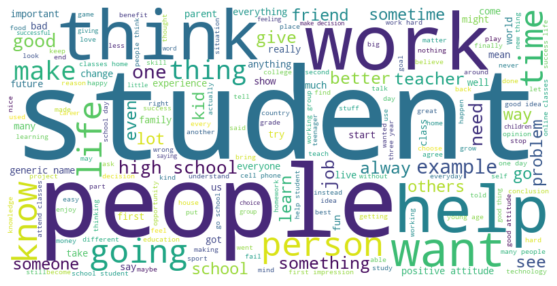

In [13]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df1.full_text))
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Simple models

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf = TfidfVectorizer(preprocessor=' '.join)

In [16]:
y = df1['vocabulary']*2

In [17]:
X = tfidf.fit_transform(df1['full_text'].str.split())
y = y.astype('int')


In [18]:
X.shape,y.shape

((3911, 21151), (3911,))

In [19]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size = 0.2, random_state = 0)

Linear SVM

In [20]:
lsvc = LinearSVC(class_weight='balanced')

In [21]:
lsvc.fit(X_train,y_train)

LinearSVC(class_weight='balanced')

In [22]:
y_pred_svc = lsvc.predict(X_dev)

In [23]:
print(classification_report(y_dev, y_pred_svc))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.23      0.14      0.18        21
           5       0.21      0.24      0.22       116
           6       0.48      0.48      0.48       320
           7       0.32      0.29      0.31       187
           8       0.20      0.24      0.22       104
           9       0.06      0.07      0.06        15
          10       0.25      0.08      0.12        13

    accuracy                           0.34       783
   macro avg       0.19      0.17      0.18       783
weighted avg       0.34      0.34      0.34       783



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic regression

In [24]:
perc = Perceptron()

In [25]:
perc.fit(X_train,y_train)

Perceptron()

In [26]:
y_pred_perc = perc.predict(X_dev)

In [27]:
print(classification_report(y_dev, y_pred_perc))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        21
           5       0.26      0.16      0.20       116
           6       0.44      0.47      0.45       320
           7       0.30      0.35      0.32       187
           8       0.18      0.15      0.17       104
           9       0.14      0.07      0.09        15
          10       0.00      0.00      0.00        13

    accuracy                           0.32       783
   macro avg       0.15      0.13      0.14       783
weighted avg       0.32      0.32      0.31       783



Naive Bayes

In [28]:
mnb = MultinomialNB()

In [29]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [30]:
y_pred_mnb = mnb.predict(X_dev)

In [31]:
print(classification_report(y_dev, y_pred_mnb))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        21
           5       0.00      0.00      0.00       116
           6       0.41      1.00      0.58       320
           7       0.00      0.00      0.00       187
           8       0.00      0.00      0.00       104
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        13

    accuracy                           0.41       783
   macro avg       0.05      0.11      0.06       783
weighted avg       0.17      0.41      0.24       783



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
